## 1. 손실 함수

### 1-1. 평균 제곱 오차 (mean squared error, MSE)

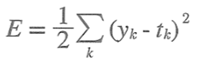

In [1]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
import numpy as np
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [3]:
#예2: '7'일 확률이 가장 높다고 추정함 
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

### 1-2. 교차 엔트로피 오차 (cross entropy error, CEE)

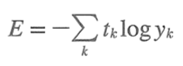
교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 됩니다.

In [4]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
    # 아주 작은 값을 더해서 절대 0이 되지 않도록, 
    # 즉 마이너스 무한대가 발생하지 않도록 한다. 

In [5]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 1-3. 미니배치 학습

In [28]:
# 훈련 데이터에서 지정한 수의 데이터를 무작위로 골라냄
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist


In [29]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [30]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
# 훈련 데이터에서 무작위로 10장만 빼냄
train_size = x_train.shape[0]  # 60000
batch_size = 10
# 0 ~ train_size 미만의 수 중에서 무작위로 batch_size개를 골라냄.
batch_mask = np.random.choice(train_size, batch_size)


In [11]:
np.random.choice(60000, 10)

array([48730, 41674, 19537, 15033,   724, 11651, 41121, 37091, 33143,
       32666])

In [12]:
# 이 함수가 출력한 배열을 
# 미니배치로 뽑아 낼 데이터의 인덱스로 사용한다. 
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [13]:
x_batch.shape

(10, 784)

In [14]:
t_batch.shape

(10, 10)

## 2. 수치 미분

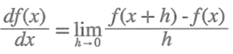

In [15]:
import numpy as np
# 미분
# 나쁜 구현 예
def numerical_diff_bad(f, x):
    h = 10e-50  # 0.00,,1 형태에서 0이 50개라는 의미
    return (f(x+h)-f(x)) / h 

1.h값이 너무 작아서 rounding error 발생 


In [16]:
# rounding error 예 
np.float32(10e-50)

0.0

2.오차를 줄이기 위해 전방차분보다 중심차분을 사용


- 전방차분
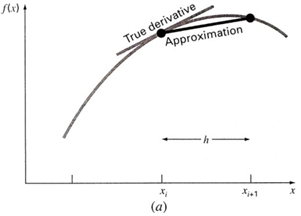

- 중심차분
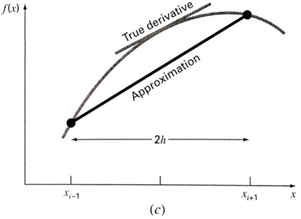

In [17]:
def numerical_diff(f, x):
    h = 1e-4  #0.0001
    return (f(x+h)-f(x-h)) / (2*h)

## 2. 기울기
모든 변수의 편미분을 벡터로 정리한 것 

In [18]:
def numerical_gradient(f, x):
    h = 1e-4  #0.0001
    grad = np.zeros_like(x)  # x와 형상이 같고 원소가 모두 0인 배열 생성 
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = tmp_val  # 값 복원 
        
    return grad

### 2-1. 경사법(경사 하강법)

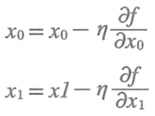

In [19]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

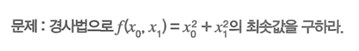

In [20]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

실제 최솟값은 (0, 0)이므로 경사법으로 거의 정확한 결과를 얻은 것입니다. 

##### 학습률이 너무 크거나 작은 경우 

In [21]:
# 학습률이 너무 큰 경우 : lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [22]:
# 학습률이 너무 작은 경우 : lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

## 3. 학습 알고리즘 구현하기

### 3-1. 2층 신경망 클래스 구현하기 

In [23]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

from common.functions import *
from common.gradient import numerical_gradient

In [24]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)    
        return y 
    
    def loss(self, x, t): # x : 입력 데이터, t : 정답 레이블
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)  # 행 기준 
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # 각 매개변수의 손실함수에 대한 기울기를 구한다. 
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)
        
        return grads

In [25]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]  # 60000
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

In [26]:
for iter in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)  ## 0 ~ train_size 미만의 수 중에서 무작위로 batch_size개를 골라냄.
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록 
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if iter % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | ' + str(train_acc) + ', ' + str(test_acc))

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7893, 0.7939
train acc, test acc | 0.8758666666666667, 0.8815
train acc, test acc | 0.8967166666666667, 0.9
train acc, test acc | 0.9074666666666666, 0.9114
train acc, test acc | 0.91425, 0.9165
train acc, test acc | 0.9196333333333333, 0.9215
train acc, test acc | 0.9236166666666666, 0.9243
train acc, test acc | 0.9277, 0.9292
train acc, test acc | 0.9311333333333334, 0.9318
train acc, test acc | 0.9339666666666666, 0.9335
train acc, test acc | 0.9370333333333334, 0.9368
train acc, test acc | 0.93975, 0.9382
train acc, test acc | 0.9410666666666667, 0.9403
train acc, test acc | 0.94285, 0.9407
train acc, test acc | 0.9450833333333334, 0.944
train acc, test acc | 0.9468833333333333, 0.9451


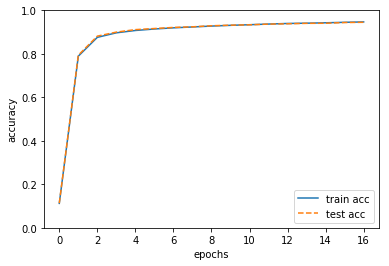

In [27]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()